In [134]:
pip install statsmodels



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/house-prices.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
df.select_dtypes(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [5]:
catogerical_df = df.select_dtypes(include=['object'])
catogerical_df.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


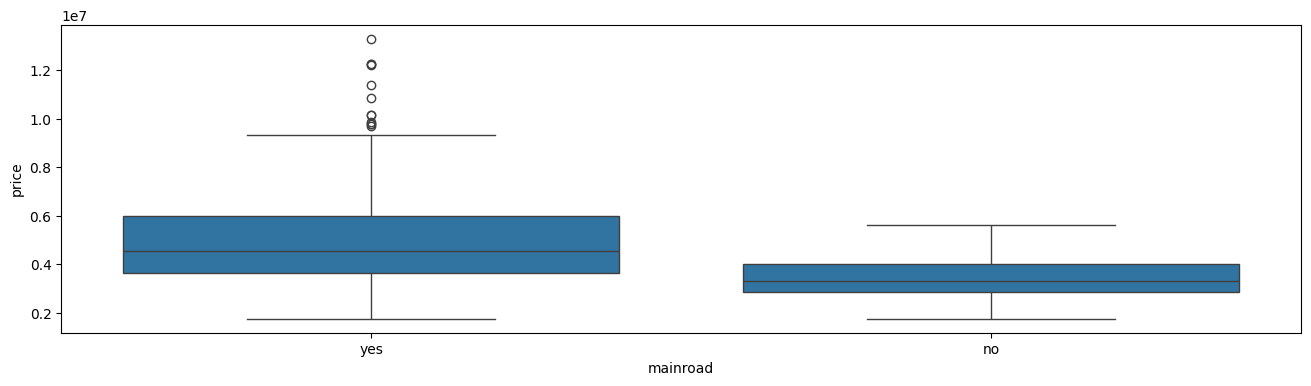

In [6]:
plt.figure(figsize = (16,4))
sns.boxplot(x = 'mainroad',y = 'price',data = df)
plt.show()

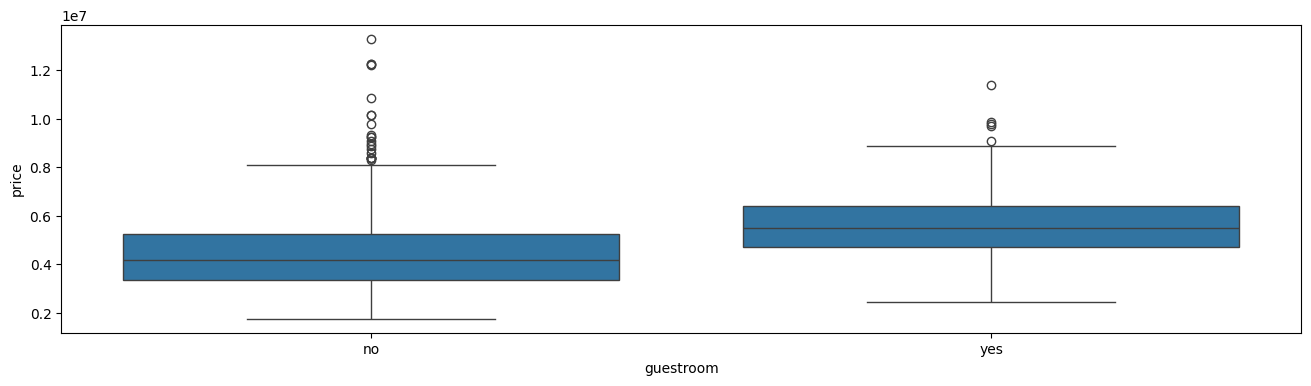

In [7]:
plt.figure(figsize = (16,4))
sns.boxplot(x = 'guestroom',y = 'price',data = df)
plt.show()

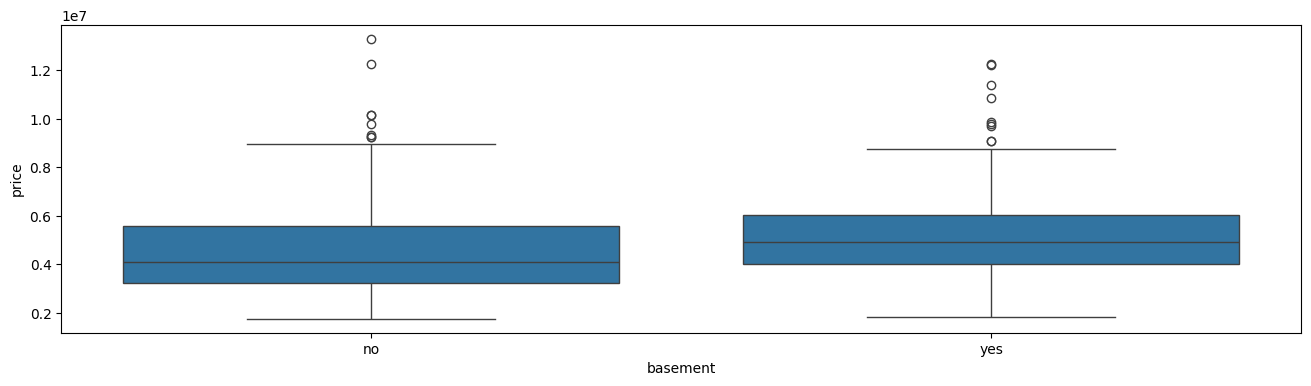

In [8]:
plt.figure(figsize = (16,4))
sns.boxplot(x = 'basement',y = 'price',data = df)
plt.show()

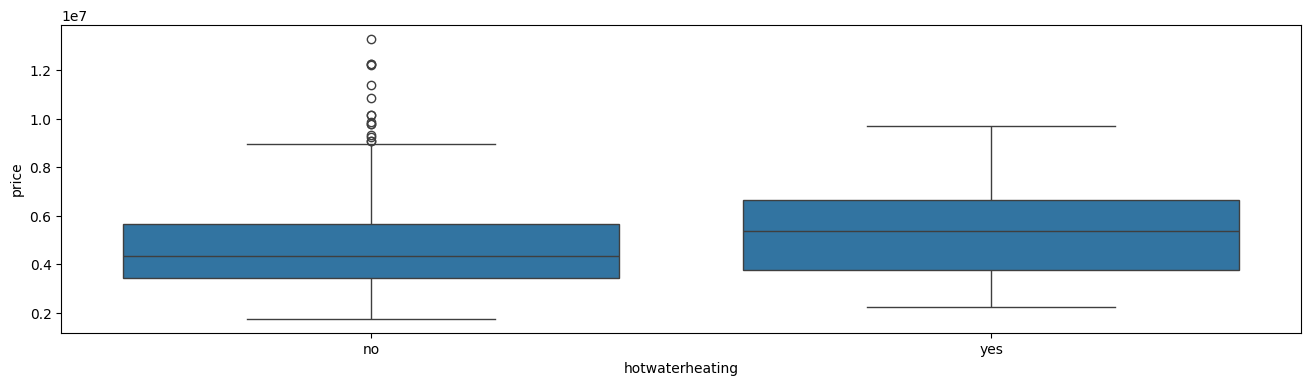

In [9]:
plt.figure(figsize = (16,4))
sns.boxplot(x = 'hotwaterheating',y = 'price',data = df)
plt.show()

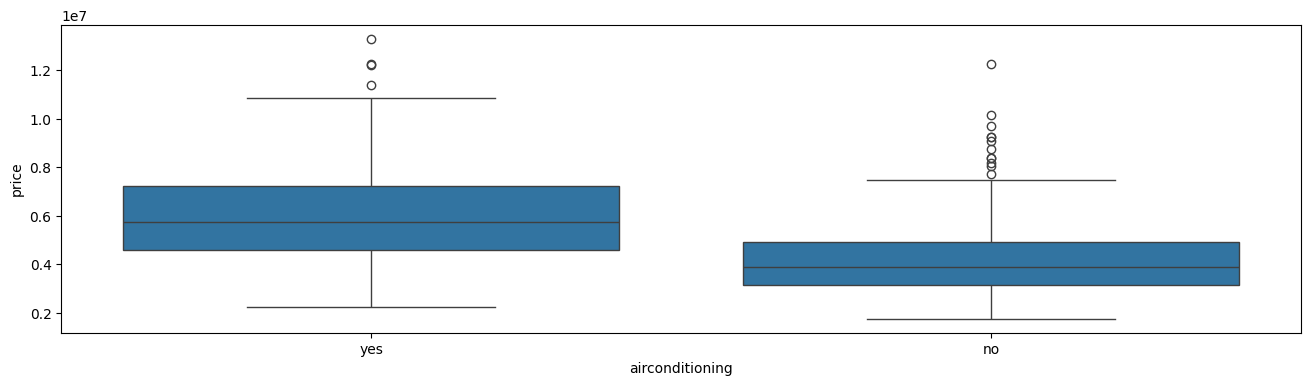

In [10]:
plt.figure(figsize = (16,4))
sns.boxplot(x = 'airconditioning',y = 'price',data = df)
plt.show()

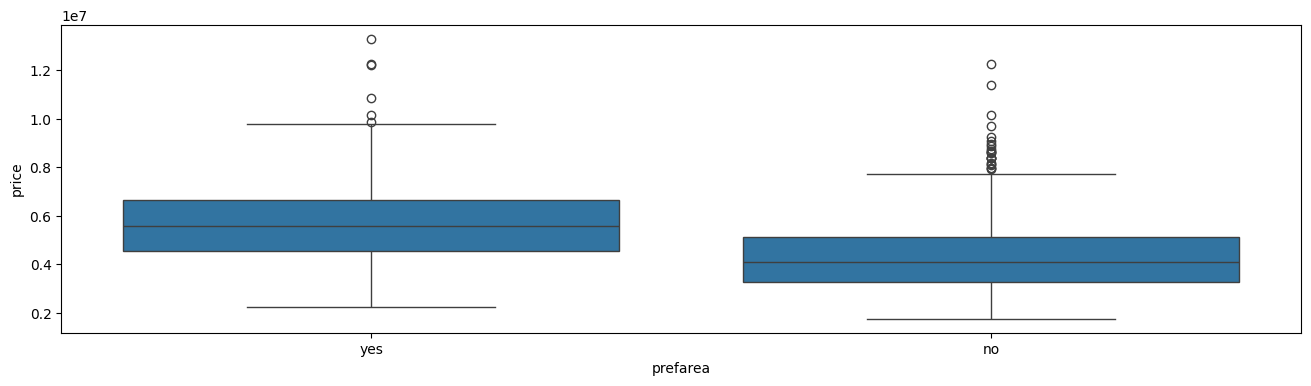

In [11]:
plt.figure(figsize = (16,4))
sns.boxplot(x = 'prefarea',y = 'price',data = df)
plt.show()

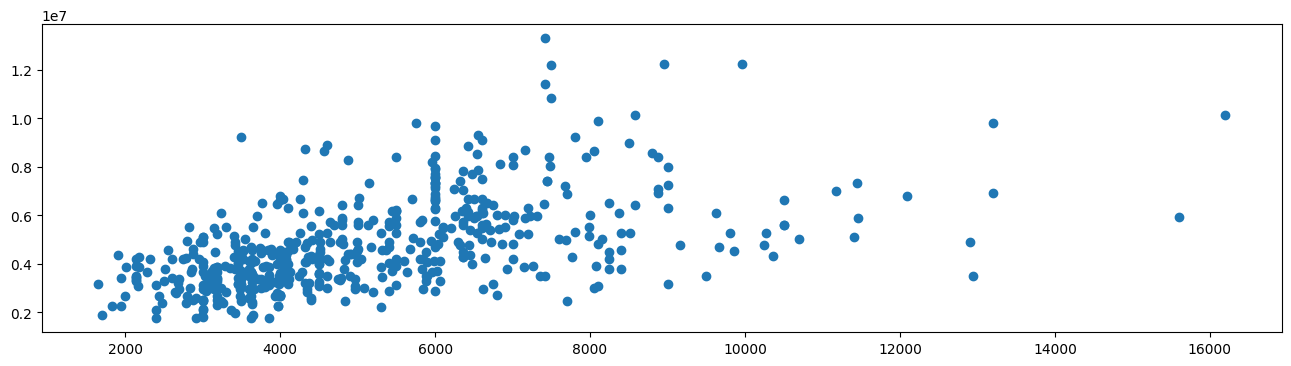

In [12]:
plt.figure(figsize = (16,4))
plt.scatter(df['area'],df['price'])
plt.show()

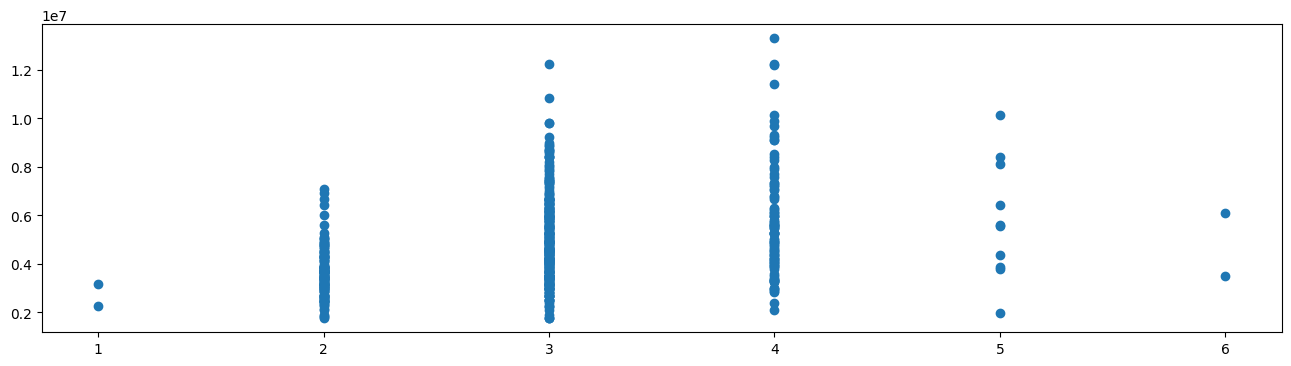

In [13]:
plt.figure(figsize = (16,4))
plt.scatter(df['bedrooms'],df['price'])
plt.show()

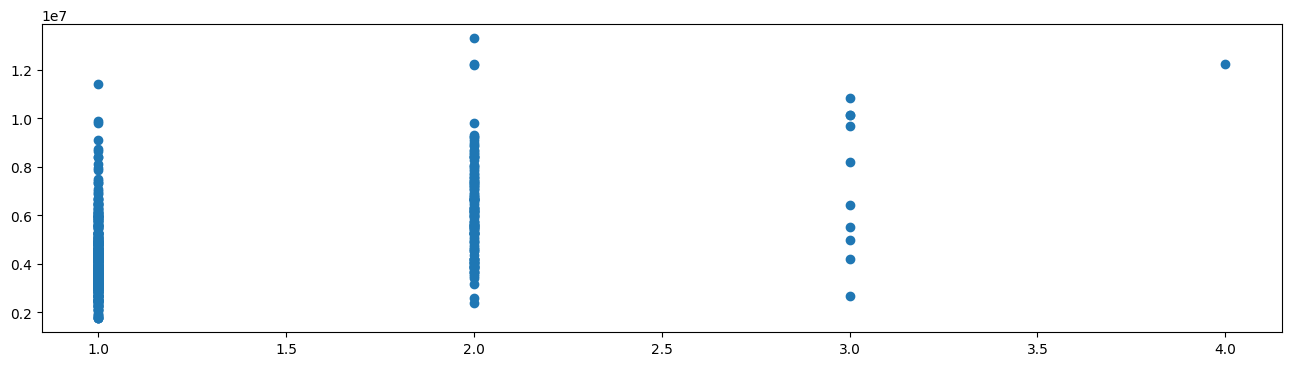

In [14]:
plt.figure(figsize = (16,4))
plt.scatter(df['bathrooms'],df['price'])
plt.show()

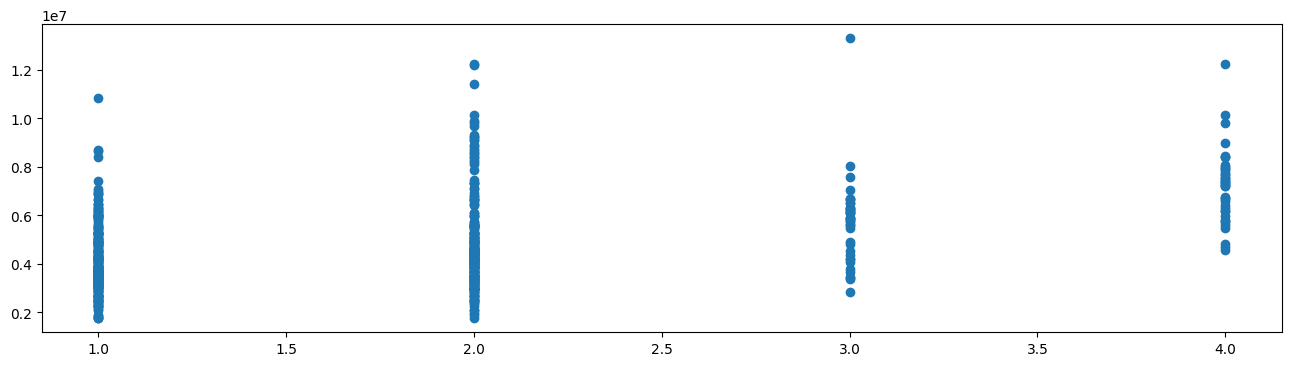

In [15]:
plt.figure(figsize = (16,4))
plt.scatter(x = df['stories'],y = df['price'])
plt.show()

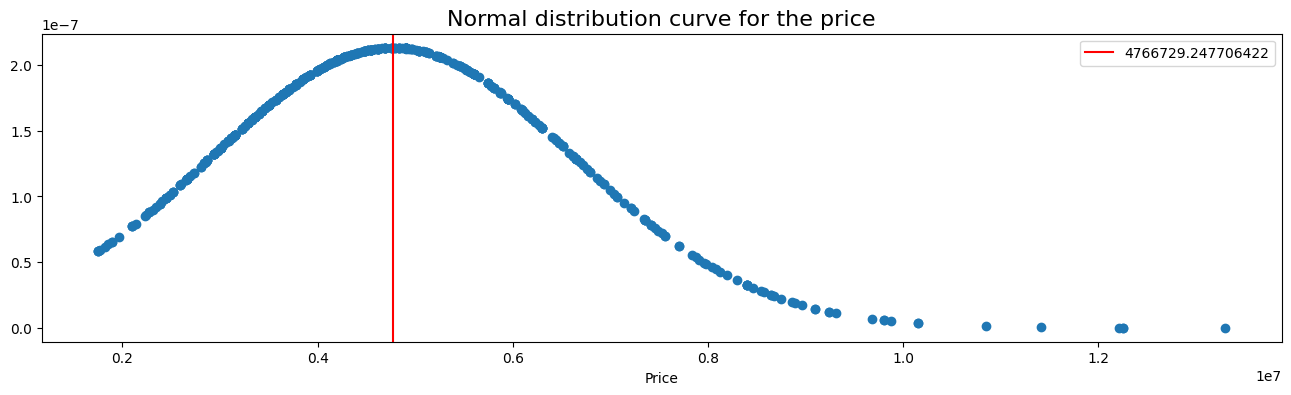

In [16]:
def prob_density_func(series,mean,std) :
  coeff = 1 / (std * np.sqrt(2*np.pi))
  power_of_e = np.exp(-(series - mean) ** 2/ (2 * std ** 2))
  prob = coeff * power_of_e
  return prob
plt.figure(figsize = (16,4))
# Plot the normal distribution curve using plt.scatter() 
plt.scatter(x=df['price'], y=prob_density_func(df['price'], df['price'].mean(), df['price'].std()))
plt.title('Normal distribution curve for the price', fontsize=16)
plt.xlabel('Price')
plt.axvline(df['price'].mean(), color='r', label=df['price'].mean())
plt.legend()
plt.show()

In [17]:
a = {'yes':1,'no':0}
def num_map(series):
  return series.map(a)
df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']].apply(num_map,axis=1)

In [19]:
df_dummies = pd.get_dummies(df["furnishingstatus"],dtype=int) 
df = pd.concat([df,df_dummies],axis=1)
df_dummies.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [20]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,1,0,0


In [26]:
df.drop(columns='furnishingstatus',axis=1,inplace=True)

In [27]:
train_df,test_df = train_test_split(df,test_size=0.3,random_state=42)

In [28]:
features = list(df.columns)
features.remove('price')
X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']
X_train.shape

(381, 14)

In [29]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [30]:
cons = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, cons).fit()
y_pred = lin_reg.predict(cons)
y_pred[:10]

126    5.298920e+06
363    3.600167e+06
370    4.452142e+06
31     6.473779e+06
113    6.313198e+06
222    6.172307e+06
462    3.195801e+06
177    4.681087e+06
57     8.779442e+06
244    5.189165e+06
dtype: float64

In [32]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     63.79
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.00e-85
Time:                        19:04:27   Log-Likelihood:                -5797.3
No. Observations:                 381   AIC:                         1.162e+04
Df Residuals:                     367   BIC:                         1.168e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -5.637e+04   2.04e+05     

In [33]:
N = X_train.shape[0]
p = X_train.shape[1]

In [34]:
r2_score = lin_reg.rsquared
adj_r2_square = 1 - ((1-r2_score)*(N - 1)) / (N - p - 1)
adj_r2_square

0.6814634225875353

In [36]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train, y_train)
y_train_pred = lin_reg2.predict(X_train)
y_test_pred  = lin_reg2.predict(X_test)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(f"Train Set\n{'-' * 50}")
print(f"R-squared = {r2_score(y_train, y_train_pred):.3f}")
print(f"Mean Squared Error = {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.3f}")

print(f"Test Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared = 0.693
Mean Squared Error = 963835379828.360
Root Mean Squared Error = 981751.180
Mean Absolute Error: 720245.199
Test Set
--------------------------------------------------
R-squared: 0.646
Mean Squared Error: 1523019469501.291
Root Mean Squared Error: 1234106.750
Mean Absolute Error: 920392.940


In [38]:
major_features = {}
for i in features:
  corr_coef = np.corrcoef(df['price'],df[i])[0,1]
  if (corr_coef >= 0.2) or (corr_coef <= -0.2):
    major_features[i] = corr_coef 

print("Number of features moderately to highly correlated with price =", len(major_features), "\n")
major_features

Number of features moderately to highly correlated with price = 11 



{'area': 0.5359973457780801,
 'bedrooms': 0.3664940257738684,
 'bathrooms': 0.5175453394550115,
 'stories': 0.42071236618861685,
 'mainroad': 0.29689848926397633,
 'guestroom': 0.2555172899350004,
 'airconditioning': 0.45295408425604866,
 'parking': 0.3843936486357261,
 'prefarea': 0.3297770498681074,
 'furnished': 0.22935031248433121,
 'unfurnished': -0.2805873573251205}

In [39]:
from sklearn.feature_selection import RFE
skl_lin_reg  = LinearRegression()
rfe = RFE(skl_lin_reg)
rfe.fit(X_train[major_features.keys()],y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True  True False  True False False]
[7 6 1 4 1 1 1 2 1 5 3]


In [40]:
rfe_features = X_train[major_features.keys()].columns[rfe.support_]
rfe_features

Index(['bathrooms', 'mainroad', 'guestroom', 'airconditioning', 'prefarea'], dtype='object')

In [41]:
X = df[rfe_features]
y = df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
# Split the DataFrame into the train and test sets such that test set has 33% of the values.
lin_reg3=LinearRegression()
lin_reg3.fit(X_train,y_train)

# Build linear regression model using the 'sklearn.linear_model' module.


print(lin_reg3.intercept_)
# Print the value of the intercept
for i in list(zip(X.columns.values,lin_reg3.coef_)):
  print(f"{i[0]}".ljust(15, " "), f"{i[1]:.6f}")

# Print the names of the features along with the values of their corresponding coefficients.


1090988.0474539748
bathrooms       1689611.316052
mainroad        971023.591542
guestroom       675316.655886
airconditioning 1129890.207308
prefarea        789247.315227


In [42]:
y_train_pred = lin_reg3.predict(X_train)
y_test_pred = lin_reg3.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train,y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train,y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train,y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train,y_train_pred):.3f}")
      
print(f"\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test,y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.529
Mean Squared Error: 1459428601962.555
Root Mean Squared Error: 1208068.128
Mean Absolute Error: 891716.322

Test Set
--------------------------------------------------
R-squared: 0.487
Mean Squared Error: 2200107666540.365
Root Mean Squared Error: 1483275.991
Mean Absolute Error: 1100491.166


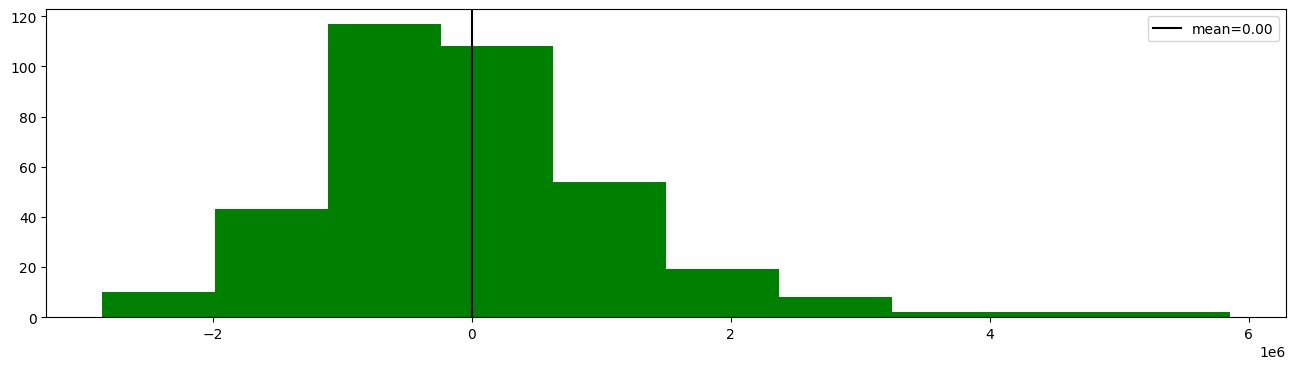

In [43]:
train_error = y_train - y_train_pred
plt.figure(figsize=(16,4))
plt.hist(train_error, bins='sturges',color='g')
plt.axvline(train_error.mean(),color='black', label=f'mean={train_error.mean():.2f}')
plt.legend()
plt.show()

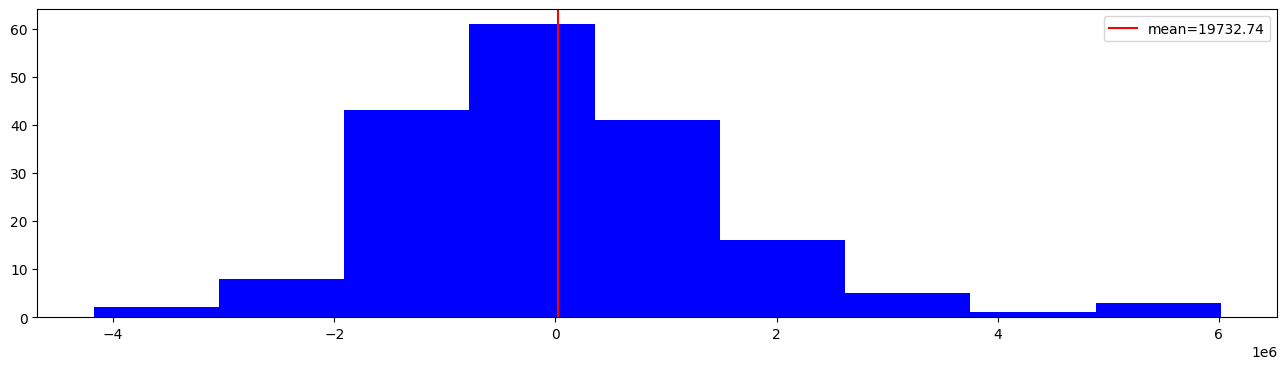

In [44]:
test_error = y_test - y_test_pred
plt.figure(figsize=(16,4))
plt.hist(test_error, bins='sturges',color='b')
plt.axvline(test_error.mean(), color='r', label=f'mean={test_error.mean():.2f}')
plt.legend()
plt.show()

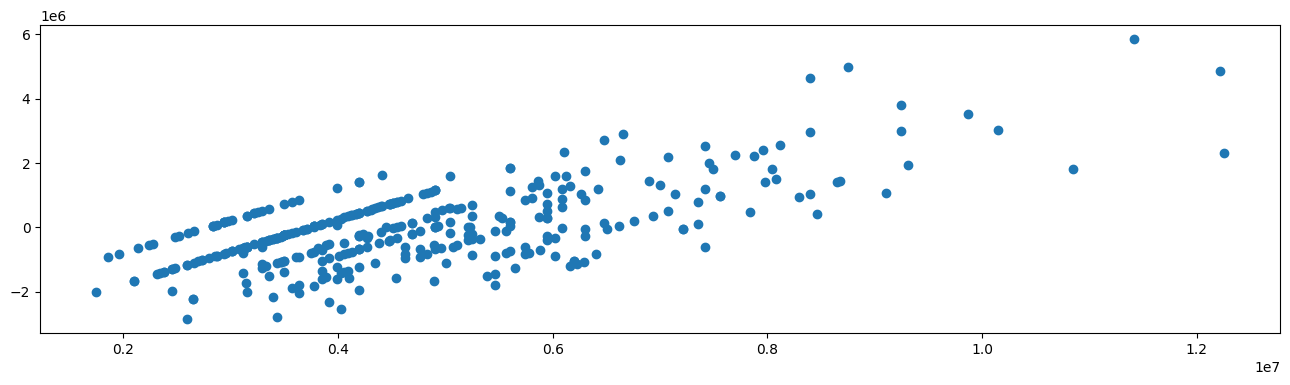

In [45]:
plt.figure(figsize=(16,4))
plt.scatter(y_train,train_error)
plt.show()